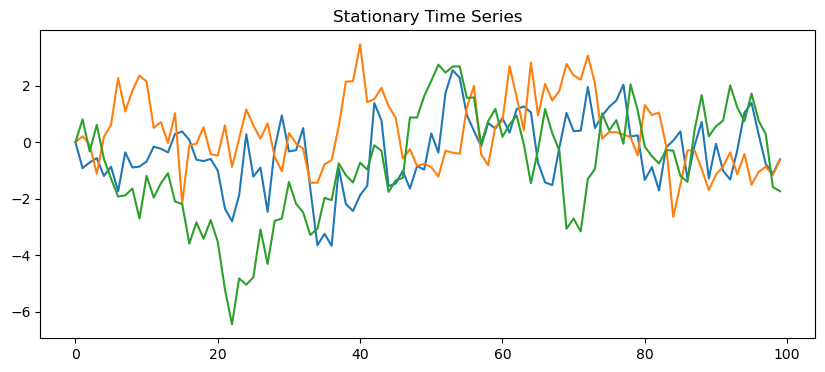

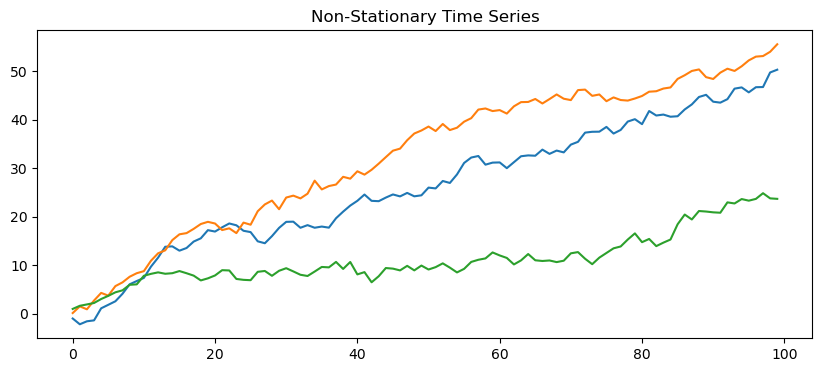

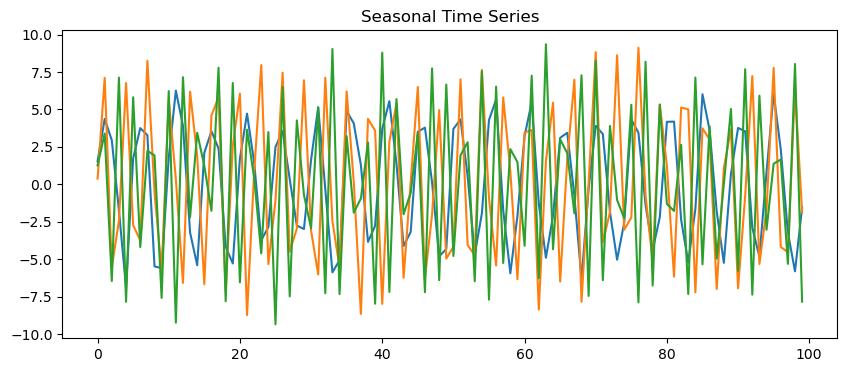

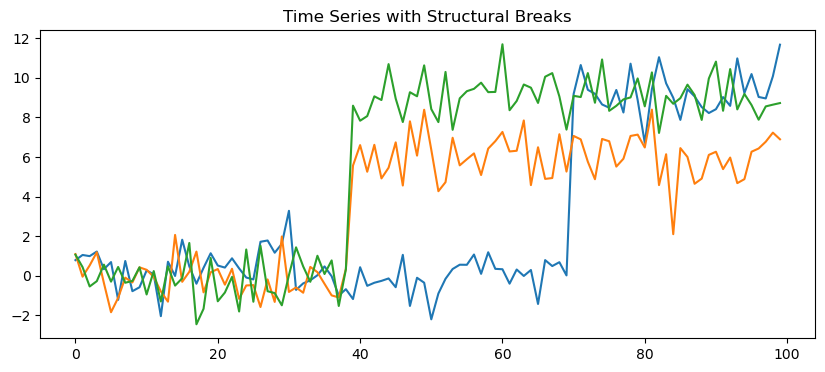

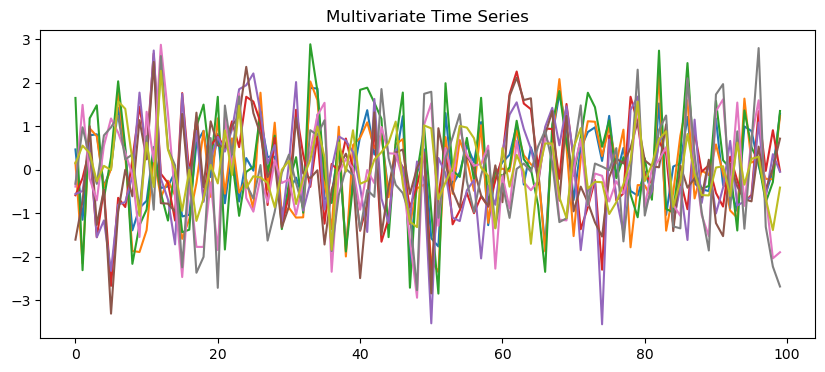

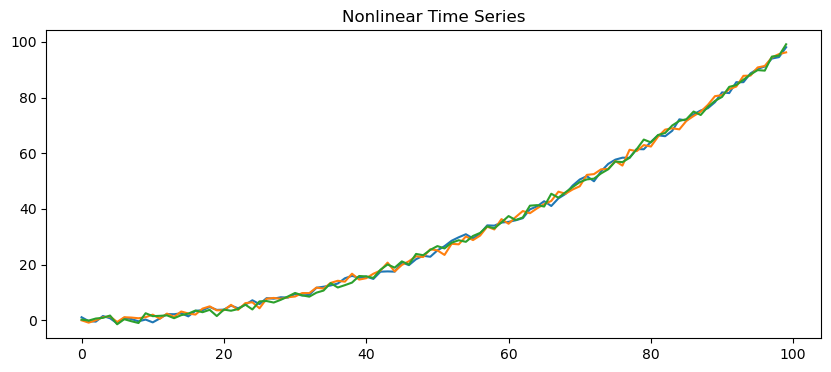

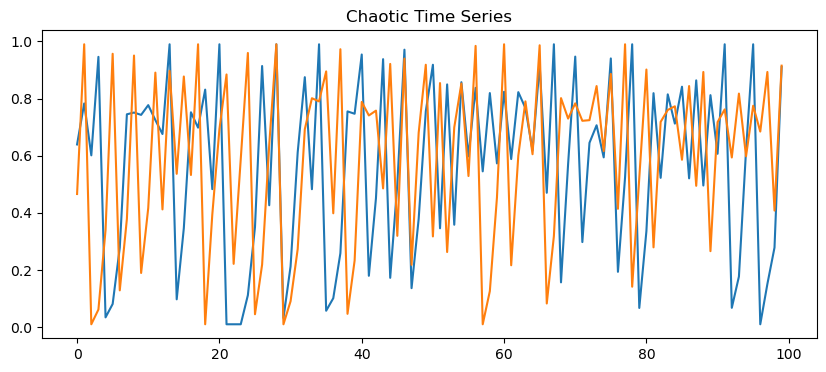

In [6]:
import numpy as np
import tsgm
from tensorflow import keras
import matplotlib.pyplot as plt

# Define parameters
seq_len = 100
feature_dim = 1
latent_dim = 10
N_EPOCHS = 1000

# Helper function to plot datasets
def plot_dataset(dataset, title):
    plt.figure(figsize=(10, 4))
    for i in range(min(len(dataset), 3)):  # Plot the first 3 series
        plt.plot(dataset[i])
    plt.title(title)
    plt.show()

# 1. Stationary Time Series (AR(1) Processes)
stationary_datasets = []
for i in range(5):
    ar_coeff = np.random.uniform(0.5, 0.9)
    noise = np.random.normal(0, 1, seq_len)
    series = np.zeros(seq_len)
    for t in range(1, seq_len):
        series[t] = ar_coeff * series[t-1] + noise[t]
    stationary_datasets.append(series.reshape(-1, 1))

plot_dataset(stationary_datasets, "Stationary Time Series")

# 2. Non-Stationary Time Series (Random Walks and Trends)
non_stationary_datasets = []
for i in range(5):
    steps = np.random.normal(0, 1, seq_len)
    trend = np.random.uniform(0.1, 0.5)
    series = np.cumsum(steps) + trend * np.arange(seq_len)
    non_stationary_datasets.append(series.reshape(-1, 1))

plot_dataset(non_stationary_datasets, "Non-Stationary Time Series")

# 3. Seasonal Time Series (Sine Waves with Noise)
seasonal_datasets = []
for i in range(5):
    freq = np.random.uniform(0.1, 0.5)
    amplitude = np.random.uniform(5, 10)
    noise = np.random.normal(0, 1, seq_len)
    series = amplitude * np.sin(2 * np.pi * freq * np.arange(seq_len)) + noise
    seasonal_datasets.append(series.reshape(-1, 1))

plot_dataset(seasonal_datasets, "Seasonal Time Series")

# 4. Time Series with Structural Breaks
structural_break_datasets = []
for i in range(5):
    breakpoint = np.random.randint(seq_len // 4, 3 * seq_len // 4)
    series = np.random.normal(0, 1, seq_len)
    series[breakpoint:] += np.random.uniform(5, 15)
    structural_break_datasets.append(series.reshape(-1, 1))

plot_dataset(structural_break_datasets, "Time Series with Structural Breaks")

# 5. Multivariate Time Series
multivariate_datasets = []
for i in range(3):
    base_series = np.random.normal(0, 1, seq_len)
    related_series_1 = base_series + np.random.normal(0, 0.5, seq_len)
    related_series_2 = base_series * np.random.uniform(0.5, 1.5) + np.random.normal(0, 0.5, seq_len)
    dataset = np.stack([base_series, related_series_1, related_series_2], axis=1)
    multivariate_datasets.append(dataset)

plot_dataset(multivariate_datasets, "Multivariate Time Series")

# 6. Nonlinear Time Series
nonlinear_datasets = []
for i in range(3):
    series = 0.01 * np.square(np.arange(seq_len)) + np.random.normal(0, 1, seq_len)
    nonlinear_datasets.append(series.reshape(-1, 1))

plot_dataset(nonlinear_datasets, "Nonlinear Time Series")

# 7. Chaotic Time Series
chaotic_datasets = []
for i in range(2):
    series = np.zeros(seq_len)
    series[0] = np.random.uniform(0.1, 0.9)
    for t in range(1, seq_len):
        series[t] = 3.8 * series[t-1] * (1 - series[t-1]) + np.random.normal(0, 0.1)
        # Clamp the value to avoid overflow
        series[t] = np.clip(series[t], 0.01, 0.99)
    chaotic_datasets.append(series.reshape(-1, 1))

plot_dataset(chaotic_datasets, "Chaotic Time Series")


# Now we have 28 datasets ready for further processing

<h2>Start with a Basic State Space Model (SSM)</h2>
<p><strong>Goal:</strong> Implement a basic linear state-space model (e.g., Kalman Filter) to get familiar with the state-space framework.</p>

<h3>Steps:</h3>
<ul>
    <li><strong>State Transition Model:</strong> Define a simple linear state transition, such as <br><em>h<sub>t</sub> = A &middot; h<sub>t-1</sub> + process noise.</em></li>
    <li><strong>Observation Model:</strong> Define an observation model, such as <br><em>y<sub>t</sub> = C &middot; h<sub>t</sub> + observation noise.</em></li>
    <li><strong>Inference:</strong> Use Kalman Filtering to estimate the hidden states from the observed data.</li>
</ul>

<h3>Python Libraries:</h3>
<p>Use libraries like <code>filterpy</code> or <code>pykalman</code> to implement and experiment with Kalman Filters.</p>


In [7]:
from pykalman import KalmanFilter
import numpy as np

# Define parameters
transition_matrix = np.array([[1]])
observation_matrix = np.array([[1]])
transition_covariance = np.array([[0.1]])
observation_covariance = np.array([[1]])
initial_state_mean = np.array([0])
initial_state_covariance = np.array([[1]])

# Generate synthetic observations
n_timesteps = 100
true_states = np.zeros(n_timesteps)
observations = np.zeros(n_timesteps)
for t in range(1, n_timesteps):
    true_states[t] = 0.5 * true_states[t-1] + np.random.normal(0, 0.1)
    observations[t] = true_states[t] + np.random.normal(0, 1)

# Kalman filter
kf = KalmanFilter(
    transition_matrices=transition_matrix,
    observation_matrices=observation_matrix,
    transition_covariance=transition_covariance,
    observation_covariance=observation_covariance,
    initial_state_mean=initial_state_mean,
    initial_state_covariance=initial_state_covariance
)

# Apply Kalman Filter
state_means, state_covariances = kf.filter(observations)


<h2>2. Implement a Dirichlet Process Mixture Model (DPMM) for Clustering</h2>
<p><strong>Goal:</strong> Implement a DPMM to understand how clustering works in a Bayesian nonparametric framework.</p>

<h3>Steps:</h3>
<ul>
    <li><strong>Clustering:</strong> Use a DPMM to cluster synthetic time series data based on their characteristics.</li>
    <li><strong>Inference:</strong> Use Gibbs Sampling or Variational Inference to estimate the cluster assignments.</li>
</ul>

<h3>Python Libraries:</h3>
<p>Use libraries like <code>scikit-learn</code> (for mixture models) and <code>PyMC3</code> or <code>Stan</code> for Bayesian inference.</p>


In [4]:
import pymc as pm
import numpy as np

# Generate synthetic data
np.random.seed(42)
n_samples = 100
cluster1 = np.random.normal(loc=0, scale=1, size=(n_samples, 2))
cluster2 = np.random.normal(loc=5, scale=1, size=(n_samples, 2))
data = np.vstack([cluster1, cluster2])

# Define the model
with pm.Model() as dpmm:
    # Prior for concentration parameter
    alpha = pm.Gamma('alpha', alpha=1.0, beta=1.0)
    
    # Categorical distribution for the cluster assignments
    k = pm.Categorical('k', p=np.ones(2) / 2, shape=data.shape[0])
    
    # Gaussian prior for the cluster means
    mu = pm.Normal('mu', mu=0, sigma=10, shape=(2, 2))
    
    # Likelihood for the observations
    obs = pm.Normal('obs', mu=mu[k], sigma=1.0, observed=data)

    # Perform Variational Inference
    approx = pm.fit(method='advi')  # You can use 'advi' or 'fullrank_advi'
    
    # Draw samples from the variational posterior
    trace = approx.sample(1000)

# Summary of the trace
print(pm.summary(trace))


ParametrizationError: Discrete variables are not supported by VI: k

<h2>3. Combine SSM with DPMM</h2>
<p><strong>Goal:</strong> Integrate the DPMM into the state-space framework to dynamically determine the number of latent states.</p>

<h3>Steps:</h3>
<ul>
    <li><strong>Dynamic Clustering:</strong> Modify the state transition model to incorporate cluster assignments from the DPMM.</li>
    <li><strong>Inference:</strong> Combine Kalman Filtering with Gibbs Sampling or Variational Inference to estimate both states and cluster assignments.</li>
</ul>

<h3>Approach:</h3>
<ul>
    <li>Extend the basic SSM to include a cluster assignment variable for each time step, determined by the DPMM.</li>
    <li>Update the state transition and observation models based on the cluster assignment.</li>
</ul>


<h2>4. Introduce the Indian Buffet Process (IBP)</h2>
<p><strong>Goal:</strong> Use the IBP to model shared and unique features across multiple time series.</p>

<h3>Steps:</h3>
<ul>
    <li><strong>Feature Representation:</strong> Introduce binary latent features that influence the state transitions or observations.</li>
    <li><strong>Inference:</strong> Use a combination of Gibbs Sampling and Variational Inference to estimate the feature matrix and its impact on the time series.</li>
</ul>

<h3>Python Libraries:</h3>
<p>Use <code>PyMC3</code> or a custom implementation for the IBP.</p>
